# HIV Cell Model 


Jeremy Skoler

In [31]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

In [53]:
init_state = State(R = 1000, L = 0, E = 0, V = 0.0000004)

,values
R,1.000000e+03
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [54]:
##def make_system():
    #init_state = State(R = 1000, L = 0, E = 0, V = 0.0000004)
    #t0 = 0
    #t_end = 120
    
    #return System(init_state=init_state, t0=t0, t_end=t_end)

In [55]:
system = System(
    CD4_arise_rate     = 1.36,
    R_activation_prop  = 0.2,
    R_death_rate       = 0.00136,
    R_infect_rate      = 0.00027,
    
    latent_infect_prop = 0.1,
    L_activation_rate  = 0.036,
    
    E_death_rate       = 0.33,
    
    V_product_rate     = 100,
    V_death_rate       = 2,
    
    t0                 = 0,
    t_end              = 120
)

,values
CD4_arise_rate,1.36000
R_activation_prop,0.20000
R_death_rate,0.00136
R_infect_rate,0.00027
latent_infect_prop,0.10000
L_activation_rate,0.03600
E_death_rate,0.33000
V_product_rate,100.00000
V_death_rate,2.00000
t0,0.00000


In [56]:
def update_func(state, t, system):
    r,l,e,v = state
    unpack(system)
    
    dR = (CD4_arise_rate * R_activation_prop) - (R_death_rate * state.R) - (R_infect_rate * state.R * state.V)
    
    dL = (latent_infect_prop * R_infect_rate * state.R * state.V) - (R_death_rate * state.L) - (L_activation_rate * state.L)
    
    dE = ((1 - latent_infect_prop) * R_infect_rate * state.R * state.V) + (L_activation_rate * state.L) - (E_death_rate * state.E)
    
    dV = (V_product_rate * state.E) - (V_death_rate * state.V)
    
    r += dR*.1
    l += dL*.1
    e += dE*.1
    v += dV*.1
    
    return State(R=r, L=l, E=e, V=v)

In [57]:
update_func(state, 0, system)

,values
R,2.000000e+02
L,2.160000e-10
E,1.944000e-09
V,3.200000e-07


In [58]:
def run_simulation(system, update_func):
    R = TimeSeries()
    L = TimeSeries()
    E = TimeSeries()
    V = TimeSeries()
    
    state = init_state
    
    for t in linrange(system.t0, system.t_end, .1):
        state = update_func(state, t, system)
        R[t+1], L[t+1], E[t+1], V[t+1] = state
    
    return R, L, E, V

In [59]:
R, L, E, V = run_simulation(system, update_func)

In [66]:
def plot_results(R, L, E, V):
    plot(R, label = 'Uninfected')
    plot(L, label = 'Latently infected')
    plot(E, label = 'Actively infected')
    plot(V, label = 'Free virons')
    decorate(title = 'HIV Model',
             xlabel = 'Time (days)',
             ylabel = 'Number of cells')
    

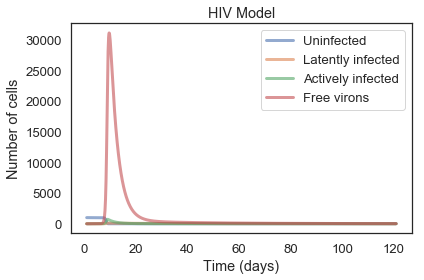

In [67]:
plot_results(R,L,E,V)